In [56]:
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
data = pd.read_csv(r"C:\Users\Cristian Lopez\Downloads\Anexo3\heartclevelandupload.csv")

In [58]:
data.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [59]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de valores faltantes y atípicos')

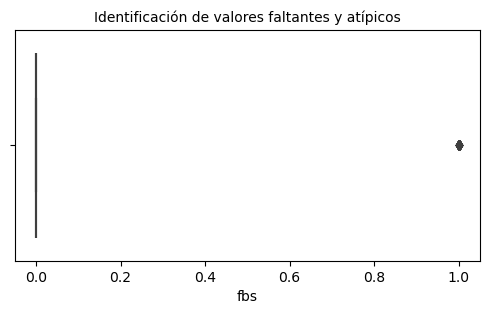

In [60]:
plt.figure(figsize=( 6, 3))
sns.boxplot(x=data['fbs'])
plt.title('Identificación de valores faltantes y atípicos', fontsize=10)


In [61]:
 print("cantidad de Registro con cero: ",data ['fbs'].isin([0]).sum())


cantidad de Registro con cero:  254


In [62]:
data['fbs']=data['fbs'].replace(0, data['fbs'].mean()) 

In [63]:
 print("cantidad de Registro con cero: ",data ['fbs'].isin([0]).sum())



cantidad de Registro con cero:  0


Text(0.5, 1.0, 'Identificación de valores faltantes y atípicos')

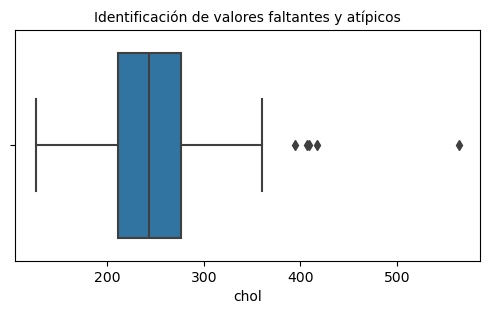

In [64]:
plt.figure(figsize=( 6, 3))
sns.boxplot(x=data['chol'])
plt.title('Identificación de valores faltantes y atípicos', fontsize=10)

In [71]:
nivel_minimo=50
nivel_maximo=500
Total_Atipicos=((data['chol']<nivel_minimo)|(data['chol']>nivel_maximo)).sum()
print("El total de atipicos es{}".format(Total_Atipicos))

El total de atipicos es0


In [69]:
data=data[(data['chol']<nivel_maximo)&(data['chol']>nivel_minimo)]

In [70]:
Total_Atipicos=((data['chol']<nivel_minimo)|(data['chol']>nivel_maximo)).sum()
print("El total de valores atipicos es {}".format(Total_Atipicos))

El total de valores atipicos es 0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        296 non-null    int64  
 1   sex        296 non-null    int64  
 2   cp         296 non-null    int64  
 3   trestbps   296 non-null    int64  
 4   chol       296 non-null    int64  
 5   fbs        296 non-null    float64
 6   restecg    296 non-null    int64  
 7   thalach    296 non-null    int64  
 8   exang      296 non-null    int64  
 9   oldpeak    296 non-null    float64
 10  slope      296 non-null    int64  
 11  ca         296 non-null    int64  
 12  thal       296 non-null    int64  
 13  condition  296 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 34.7 KB


In [42]:
data['condition'].value_counts()

condition
0    159
1    137
Name: count, dtype: int64

In [47]:
data[['condition']].head(40)

,condition
0,0.461279
1,0.461279
2,0.461279
3,1.000000
4,0.461279
5,0.461279
6,0.461279
7,1.000000
8,0.461279
9,0.461279


In [43]:
X=data.drop('condition',axis=1)
Y=data['condition']

In [44]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.25, stratify=Y, random_state=0)

In [45]:
print(X_train)

     age  sex  cp  trestbps  chol       fbs  restecg  thalach  exang  oldpeak  \
232   57    0   3       128   303  0.144781        2      159      0      0.0   
53    48    1   1       130   245  0.144781        2      180      0      0.2   
102   58    1   2       140   211  1.000000        2      165      0      0.0   
187   62    1   3       120   267  0.144781        0       99      1      1.8   
169   66    1   3       160   228  0.144781        2      138      0      2.3   
..   ...  ...  ..       ...   ...       ...      ...      ...    ...      ...   
73    71    0   2       110   265  1.000000        2      130      0      0.0   
167   66    0   3       178   228  1.000000        0      165      1      1.0   
154   37    0   2       120   215  0.144781        0      170      0      0.0   
153   37    1   2       130   250  0.144781        0      187      0      3.5   
259   51    0   3       130   305  0.144781        0      142      1      1.2   

     slope  ca  thal  
232 

In [46]:
print (Y_train)

232    0
53     0
102    0
187    1
169    0
      ..
73     0
167    1
154    0
153    0
259    1
Name: condition, Length: 222, dtype: int64


In [51]:
modelo_regresion= LogisticRegression(solver= "liblinear")
modelo_regresion.fit(X_train , Y_train)
Prediccion = modelo_regresion.predict(X_test)

In [52]:
print(Y_test)

112    0
250    1
240    1
211    1
285    0
      ..
172    0
136    1
138    0
201    1
258    1
Name: condition, Length: 74, dtype: int64


In [53]:
print(Prediccion)

[0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1]


In [54]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.85      0.87        34

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



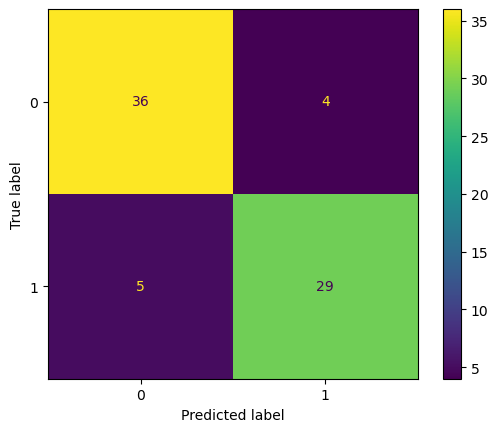

In [55]:
cm= confusion_matrix(Y_test, Prediccion)
disp= metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

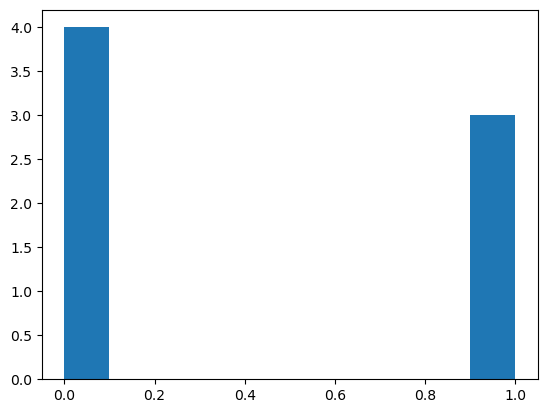

In [72]:
plt.hist(data.condition)